In [16]:
import io
import glob
import numpy as np
import scipy as sp
import scipy.ndimage as nd
import tensorflow as tf
import matplotlib as mp
import matplotlib.pyplot as plt

mp.rc('image', cmap='gray', aspect='auto', interpolation='none')

In [43]:
filenames = glob.glob('/tmp/mrtous/events.out.*')

class Run(object):
    
    def __init__(self, name):
        self.name = name
        self.us = []
        self.mr = []
        self.re = []
        self.df = []
        self.loss = []
        
    def from_event_value(self, value):
        decode = lambda s: nd.imread(io.BytesIO(s))
        
        if value.tag == self.name+'/loss':
            self.loss.append(value.simple_value)
        if value.tag == self.name+'/us/image':
            self.us.append(decode(value.image.encoded_image_string))
        if value.tag == self.name+'/mr/image':
            self.mr.append(decode(value.image.encoded_image_string))
        if value.tag == self.name+'/re/image':
            self.re.append(decode(value.image.encoded_image_string))
        if value.tag == self.name+'/df/image':
            self.df.append(decode(value.image.encoded_image_string))


images_test = Run('test/images')
images_valid = Run('valid/images')
images_train = Run('train/images')
images = [images_test, images_valid, images_train]

patches_test = Run('test/patches')
patches_valid = Run('valid/patches')
patches_train = Run('train/patches')
patches = [patches_test, patches_valid, patches_train]

for event in tf.train.summary_iterator(filenames[0]):
    for value in event.summary.value:
        for run in images + patches:
            run.from_event_value(value)

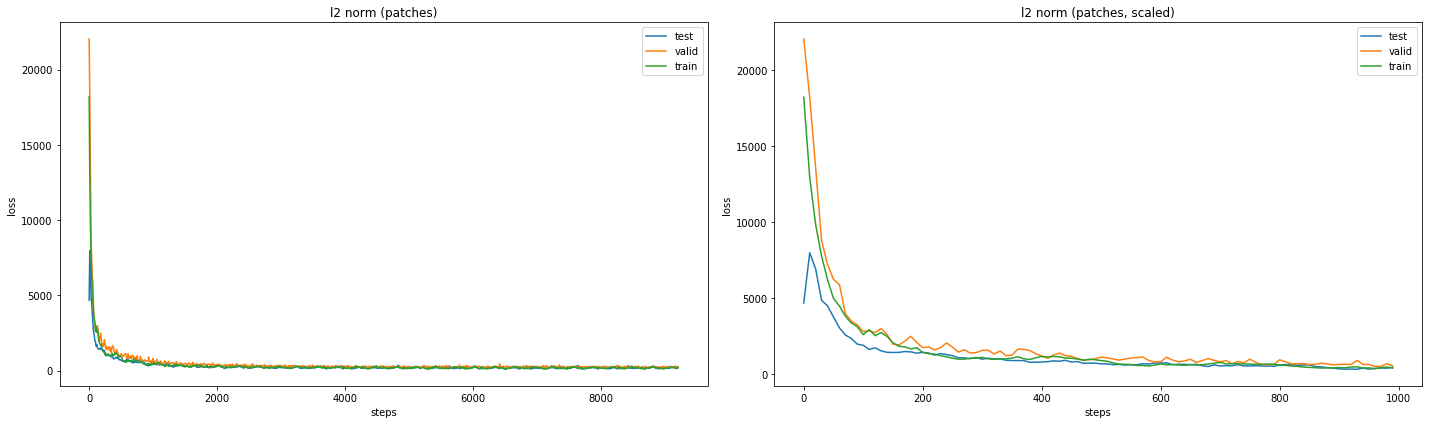

In [44]:
def plot_loss_subplot(title, test_loss, valid_loss, train_loss):
    steps = np.arange(0, 10*len(test_loss), 10)
    plt.title(title)
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.plot(steps, test_loss, label='test')
    plt.plot(steps, valid_loss, label='valid')
    plt.plot(steps, train_loss, label='train')
    plt.legend()

def plot_loss_figure(test_loss, valid_loss, train_loss, offset):
    plt.figure(figsize=[20, 6])
    
    plt.subplot2grid([1, 2], [0, 0])
    plot_loss_subplot('l2 norm (patches)', test_loss, valid_loss, train_loss)
    
    plt.subplot2grid([1, 2], [0, 1])
    plot_loss_subplot('l2 norm (patches, scaled)', test_loss[:offset], valid_loss[:offset], train_loss[:offset])
    plt.tight_layout()
    plt.show()
    
plot_loss_figure(patches_test.loss, patches_valid.loss, patches_train.loss, 100)

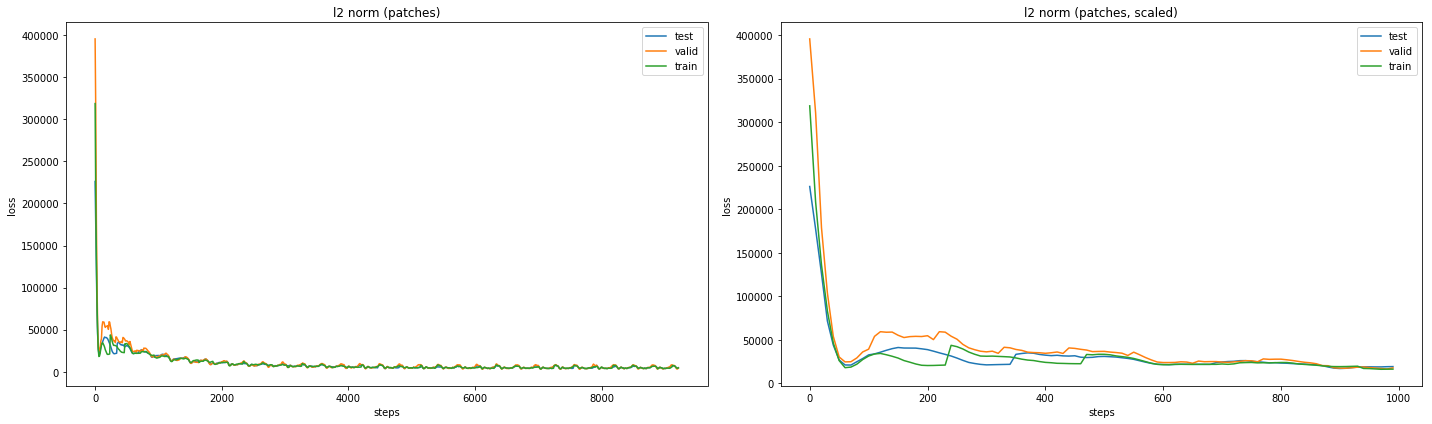

In [45]:
plot_loss_figure(images_test.loss, images_valid.loss, images_train.loss, 100)

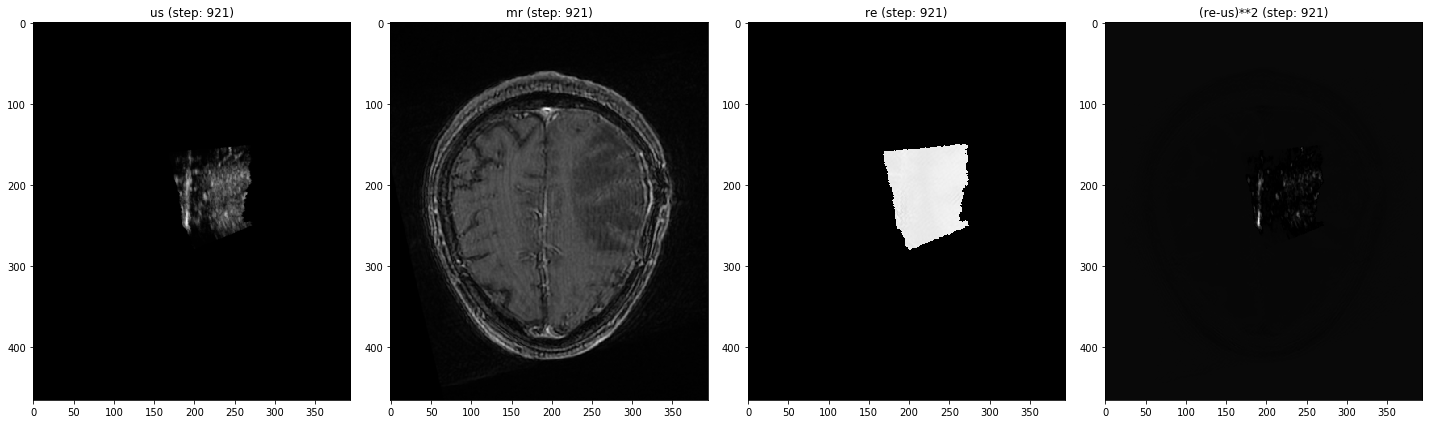

In [50]:
def plot_images(run, step):
    plt.figure(figsize=[20, 6])

    plt.subplot2grid([1, 4], [0, 0])
    plt.title('us (step: {})'.format(step))
    plt.imshow(run.us[step])
    
    plt.subplot2grid([1, 4], [0, 1])
    plt.title('mr (step: {})'.format(step))
    plt.imshow(run.mr[step])

    plt.subplot2grid([1, 4], [0, 2])
    plt.title('re (step: {})'.format(step))
    plt.imshow(run.re[step])
          
    plt.subplot2grid([1, 4], [0, 3])
    plt.title('(re-us)**2 (step: {})'.format(step))
    plt.imshow(run.df[step])

    plt.tight_layout()
    plt.show()
    
plot_images(images_train, len(images_train.us)-1)

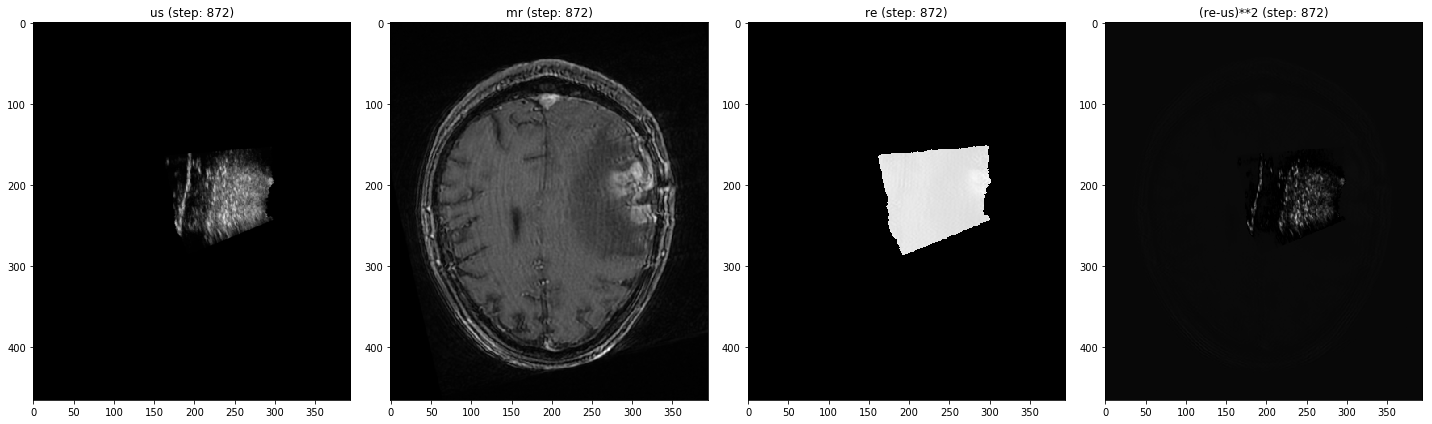

In [51]:
plot_images(images_train, len(images_train.us)-50)

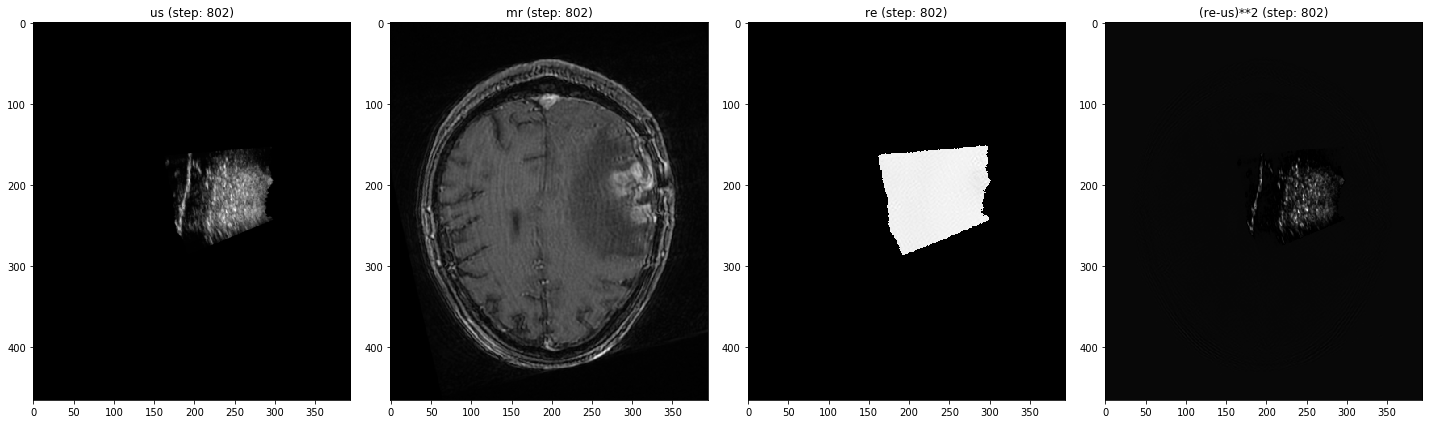

In [52]:
plot_images(images_train, len(images_train.us)-120)

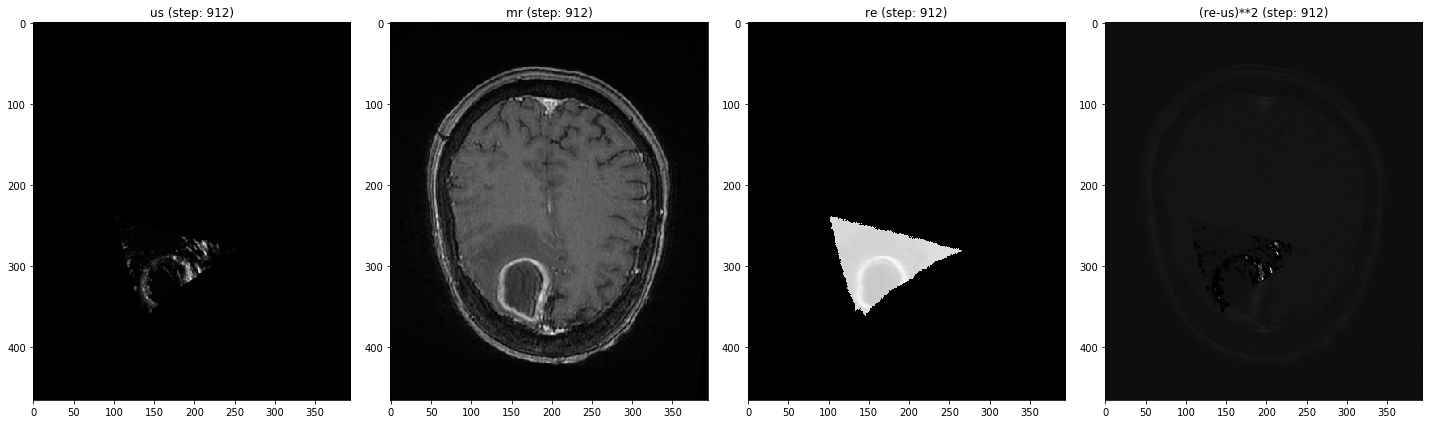

In [54]:
plot_images(images_test, len(images_test.us)-10)

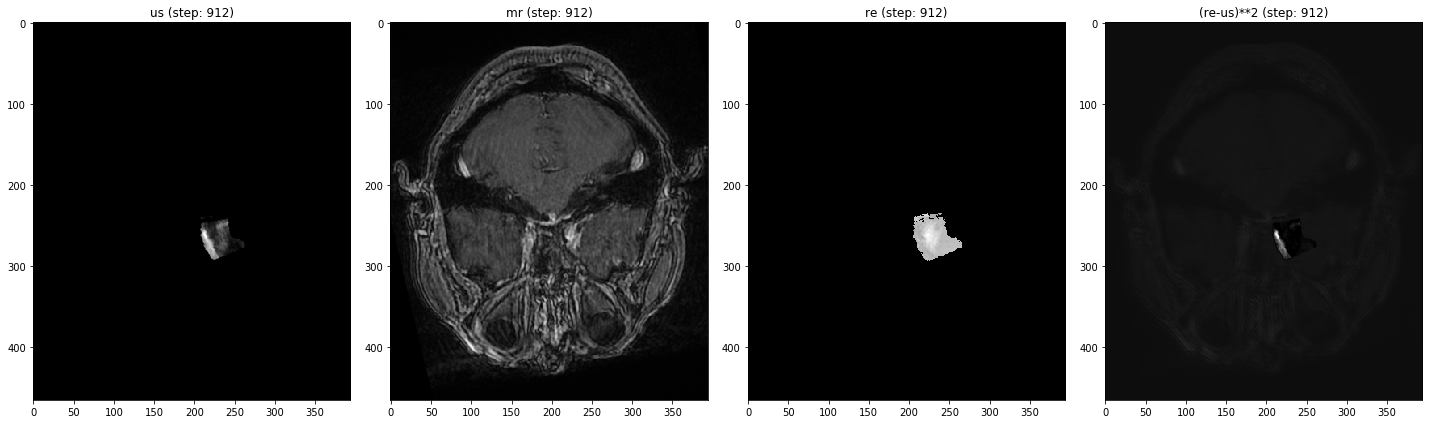

In [55]:
plot_images(images_valid, len(images_valid.us)-10)

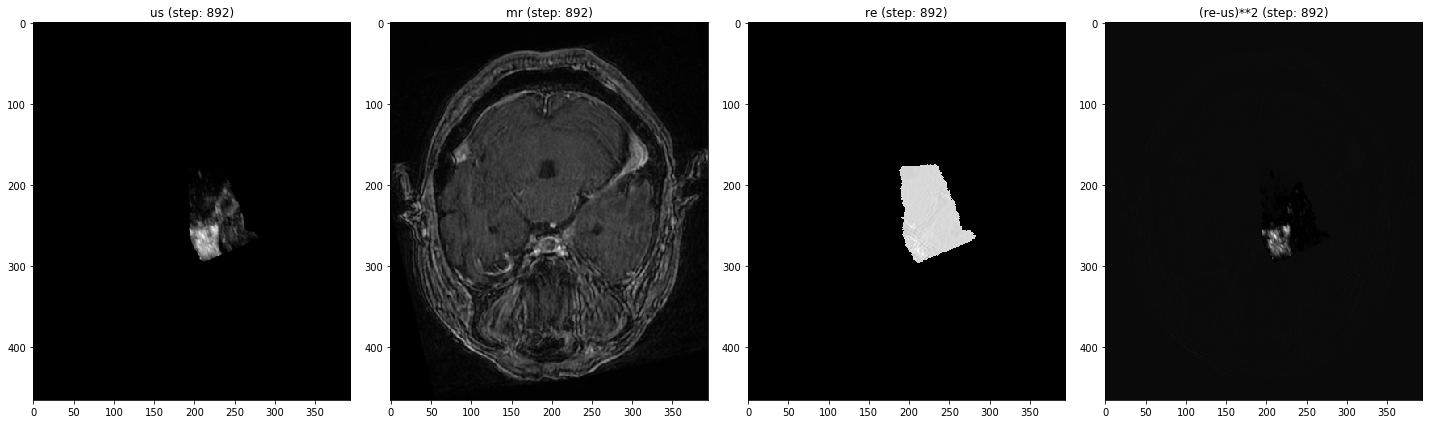

In [58]:
plot_images(images_valid, len(images_valid.us)-30)